# NBA Player Value based on Win-Shares and Salary

In [2]:
#import required packages
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

### Create Dataframe from csv
#### Last updated 4/7/2019, includes games through 4/6/2019


In [3]:
#creating player stats df from csv
df_stats = pd.read_csv('nba_player_stats.csv')

In [4]:
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1,-3.4,-0.2
1,2,Quincy Acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.02,-5.6,-0.3,-5.9,-0.1
2,3,Jaylen Adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,Steven Adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4,9.1,0.168,0.8,2.2,3,3.3
4,5,Bam Adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3,2.4


## Headers throughout the table are in csv for readability, removing for analysis purposes

In [5]:
df_stats = df_stats.drop(df_stats[(df_stats.Rk == 'Rk')].index)

In [6]:
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1,-3.4,-0.2
1,2,Quincy Acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.02,-5.6,-0.3,-5.9,-0.1
2,3,Jaylen Adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,Steven Adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4,9.1,0.168,0.8,2.2,3,3.3
4,5,Bam Adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3,2.4


In [7]:
#full definition of all columns can be found at https://www.basketball-reference.com/leagues/NBA_2019_advanced.html
list(df_stats)

['Rk',
 'Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

### View how columns were imported
We need to see what kind of object or type the columns are.

In [8]:
df_stats.dtypes

Rk        object
Player    object
Pos       object
Age       object
Tm        object
G         object
MP        object
PER       object
TS%       object
3PAr      object
FTr       object
ORB%      object
DRB%      object
TRB%      object
AST%      object
STL%      object
BLK%      object
TOV%      object
USG%      object
OWS       object
DWS       object
WS        object
WS/48     object
OBPM      object
DBPM      object
BPM       object
VORP      object
dtype: object

## Casting a column to Float from an Object
This is the quick and easy pandas way of doing it.

In [9]:
# ORB% is an object as noted above now check the coloumn out.
df_stats['ORB%'] = pd.to_numeric(df_stats['ORB%'], errors='coerce')

In [10]:
df_stats.dtypes

Rk         object
Player     object
Pos        object
Age        object
Tm         object
G          object
MP         object
PER        object
TS%        object
3PAr       object
FTr        object
ORB%      float64
DRB%       object
TRB%       object
AST%       object
STL%       object
BLK%       object
TOV%       object
USG%       object
OWS        object
DWS        object
WS         object
WS/48      object
OBPM       object
DBPM       object
BPM        object
VORP       object
dtype: object

### Convert all object to string object
We want to make sure we are working with the right type of strings here.

In [11]:
list_col = df_stats.columns

for col_name in list_col:
    df_stats[col_name] = df_stats[col_name].astype(str) # Cast from Object alone to String Object
    

In [12]:
df_stats.dtypes

Rk        object
Player    object
Pos       object
Age       object
Tm        object
G         object
MP        object
PER       object
TS%       object
3PAr      object
FTr       object
ORB%      object
DRB%      object
TRB%      object
AST%      object
STL%      object
BLK%      object
TOV%      object
USG%      object
OWS       object
DWS       object
WS        object
WS/48     object
OBPM      object
DBPM      object
BPM       object
VORP      object
dtype: object

# Now for the fun part. Convert numerical columns from objects to Numerical Objects.
For the fun part. Finding the list of columns we want as strings,
and convert those we want to numerical columns.

In [13]:
def converted_df(df_stats, list_to_remove=[]):
    
    list_col_names = df_stats.columns
    col_name_to_not_convert = ['Rk', 'Player', 'Pos', 'Tm']

    # This Flnds the difference of the total list of columns and removes the list of names to remain as Strings
    col_name_to_convert = list(set(col_name_to_not_convert)^set(list_col_names))

    print('Columns to convert to Float: \n',col_name_to_convert)

In [14]:
list_col_names = df_stats.columns
col_name_to_not_convert = ['Rk', 'Player', 'Pos', 'Tm']
sothing = ['BLK%', 'DBPM', 'BPM', 'STL%', 'TRB%', 'OWS', 'TS%', 'DRB%', 'FTr', 'AST%', 'WS', 'VORP', 'USG%', 'ORB%', 'PER', 'Age', 'TOV%', 'G', 'WS/48', 'DWS', '3PAr', 'OBPM', 'MP']

# This Flnds the difference of the total list of columns and removes the list of names to remain as Strings
col_name_to_convert = list(set(col_name_to_not_convert)^set(list_col_names))

print('Columns to convert to Float: \n',col_name_to_convert)

Columns to convert to Float: 
 ['BLK%', 'TS%', 'TOV%', 'AST%', 'DWS', 'G', 'FTr', 'PER', 'BPM', 'WS', 'DBPM', 'WS/48', 'DRB%', 'OBPM', 'VORP', 'ORB%', 'USG%', 'Age', 'MP', 'STL%', 'OWS', '3PAr', 'TRB%']


## Now convert the ojects to Numerical objects.
This website may help you to understand the used cases of how to cast columns.
https://pbpython.com/pandas_dtypes.html

In [15]:
for col_name in col_name_to_convert:
    df_stats[col_name] = pd.to_numeric(df_stats[col_name], errors='coerce')

In [16]:
df_stats.dtypes

Rk         object
Player     object
Pos        object
Age         int64
Tm         object
G           int64
MP          int64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
dtype: object

In [17]:
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1.0,-3.4,-0.2
1,2,Quincy Acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.020,-5.6,-0.3,-5.9,-0.1
2,3,Jaylen Adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,Steven Adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4.0,9.1,0.168,0.8,2.2,3.0,3.3
4,5,Bam Adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3.0,2.4


In [18]:
df_contract = pd.read_csv('nba_player_contracts.csv', index_col=False)
df_contract.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Salary,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Rk,Player,Tm,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,Signed Using,Guaranteed
1,1,Stephen Curry,GSW,"37,457,154.00","40,231,758.00","43,006,362.00","45,780,966.00",NaN,NaN,Bird Rights,"166,476,240.00"
2,2,Chris Paul,HOU,"35,654,150.00","38,506,482.00","41,358,814.00","44,211,146.00",NaN,NaN,NaN,"159,730,592.00"
3,3,Russell Westbrook,OKC,"35,654,150.00","38,178,000.00","41,006,000.00","43,848,000.00","46,662,000.00",NaN,Bird Rights,"158,686,150.00"
4,4,LeBron James,LAL,"35,654,150.00","37,436,858.00","39,219,565.00","41,002,273.00",NaN,NaN,NaN,"113,310,573.00"


In [19]:
df_col_name = list(df_contract.iloc[0])
# 3 - 8 have spacing
df_col_name[3] = '2018-19'
df_col_name[4] = '2019-20'
df_col_name[5] = '2020-21'
df_col_name[6] = '2021-22'
df_col_name[7] = '2022-23'
df_col_name[8] = '2023-24'
print(df_col_name)

['Rk', 'Player', 'Tm', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24', 'Signed Using', ' Guaranteed ']


In [20]:
df_contract.columns = df_col_name
df_contract.head()

,Rk,Player,Tm,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,Signed Using,Guaranteed
0,Rk,Player,Tm,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,Signed Using,Guaranteed
1,1,Stephen Curry,GSW,"37,457,154.00","40,231,758.00","43,006,362.00","45,780,966.00",NaN,NaN,Bird Rights,"166,476,240.00"
2,2,Chris Paul,HOU,"35,654,150.00","38,506,482.00","41,358,814.00","44,211,146.00",NaN,NaN,NaN,"159,730,592.00"
3,3,Russell Westbrook,OKC,"35,654,150.00","38,178,000.00","41,006,000.00","43,848,000.00","46,662,000.00",NaN,Bird Rights,"158,686,150.00"
4,4,LeBron James,LAL,"35,654,150.00","37,436,858.00","39,219,565.00","41,002,273.00",NaN,NaN,NaN,"113,310,573.00"


In [21]:
df_contract.drop(df_contract.head(1).index, inplace=True)
df_contract.head()

,Rk,Player,Tm,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,Signed Using,Guaranteed
1,1,Stephen Curry,GSW,"37,457,154.00","40,231,758.00","43,006,362.00","45,780,966.00",NaN,NaN,Bird Rights,"166,476,240.00"
2,2,Chris Paul,HOU,"35,654,150.00","38,506,482.00","41,358,814.00","44,211,146.00",NaN,NaN,NaN,"159,730,592.00"
3,3,Russell Westbrook,OKC,"35,654,150.00","38,178,000.00","41,006,000.00","43,848,000.00","46,662,000.00",NaN,Bird Rights,"158,686,150.00"
4,4,LeBron James,LAL,"35,654,150.00","37,436,858.00","39,219,565.00","41,002,273.00",NaN,NaN,NaN,"113,310,573.00"
5,5,Blake Griffin,DET,"32,088,932.00","34,234,964.00","36,595,996.00","38,957,028.00",NaN,NaN,Bird Rights,"102,919,892.00"


In [22]:
# Convert String Salary to float
# Example convert '45,780,966.00' to 45780966.00
""""""
salary_col = ['2018-19','2019-20', '2020-21','2021-22','2022-23', '2023-24']

for salary_year in salary_col:
    for index, sal_num in df_contract[salary_year].iteritems():
        str_sal = str(sal_num)

        #str_sal = str_sal.replace(',', '') # Remove commas
        #str_sal = str_sal.replace(' ', '') # remove spacing

        if str_sal == 'nan':
            str_sal = np.NAN
        elif ',' in str_sal :
            str_sal = str_sal.replace(',', '') # Remove commas
            str_sal = str_sal.replace(' ', '') # remove spacing
            str_sal = np.float32(str_sal)
        else:
            str_sal = np.NAN
        
        df_contract.ix[index, salary_year] = str_sal


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [23]:
df_contract.head()

,Rk,Player,Tm,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,Signed Using,Guaranteed
1,1,Stephen Curry,GSW,3.74572e+07,4.02318e+07,4.30064e+07,4.5781e+07,NaN,NaN,Bird Rights,"166,476,240.00"
2,2,Chris Paul,HOU,3.56542e+07,3.85065e+07,4.13588e+07,4.42111e+07,NaN,NaN,NaN,"159,730,592.00"
3,3,Russell Westbrook,OKC,3.56542e+07,3.8178e+07,4.1006e+07,4.3848e+07,4.6662e+07,NaN,Bird Rights,"158,686,150.00"
4,4,LeBron James,LAL,3.56542e+07,3.74369e+07,3.92196e+07,4.10023e+07,NaN,NaN,NaN,"113,310,573.00"
5,5,Blake Griffin,DET,3.20889e+07,3.4235e+07,3.6596e+07,3.8957e+07,NaN,NaN,Bird Rights,"102,919,892.00"


In [24]:
df_contract['Player'] = df_contract['Player'].str.lower()

In [25]:
df_contract.head()

,Rk,Player,Tm,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,Signed Using,Guaranteed
1,1,stephen curry,GSW,3.74572e+07,4.02318e+07,4.30064e+07,4.5781e+07,NaN,NaN,Bird Rights,"166,476,240.00"
2,2,chris paul,HOU,3.56542e+07,3.85065e+07,4.13588e+07,4.42111e+07,NaN,NaN,NaN,"159,730,592.00"
3,3,russell westbrook,OKC,3.56542e+07,3.8178e+07,4.1006e+07,4.3848e+07,4.6662e+07,NaN,Bird Rights,"158,686,150.00"
4,4,lebron james,LAL,3.56542e+07,3.74369e+07,3.92196e+07,4.10023e+07,NaN,NaN,NaN,"113,310,573.00"
5,5,blake griffin,DET,3.20889e+07,3.4235e+07,3.6596e+07,3.8957e+07,NaN,NaN,Bird Rights,"102,919,892.00"


In [26]:
df_stats['Player'] = df_stats['Player'].str.lower()
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,alex abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1.0,-3.4,-0.2
1,2,quincy acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.020,-5.6,-0.3,-5.9,-0.1
2,3,jaylen adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,steven adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4.0,9.1,0.168,0.8,2.2,3.0,3.3
4,5,bam adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3.0,2.4


In [27]:
df_full_data = pd.merge(df_stats, df_contract, on='Player', how='outer')

In [28]:
# Now it is merged
print(df_full_data)

    Rk_x                  Player  Pos   Age Tm_x     G      MP   PER    TS%  \
0      1            alex abrines   SG  25.0  OKC  31.0   588.0   6.3  0.507   
1      2              quincy acy   PF  28.0  PHO  10.0   123.0   2.9  0.379   
2      3            jaylen adams   PG  22.0  ATL  32.0   393.0   7.9  0.479   
3      4            steven adams    C  25.0  OKC  77.0  2593.0  18.9  0.596   
4      5             bam adebayo    C  21.0  MIA  79.0  1841.0  17.8  0.623   
5      6               deng adel   SF  21.0  CLE  17.0   187.0   1.7  0.376   
6      7  devaughn akoon-purcell   SG  25.0  DEN   7.0    22.0   8.2  0.322   
7      8       lamarcus aldridge    C  33.0  SAS  79.0  2621.0  22.7  0.573   
8      9            rawle alkins   SG  21.0  CHI   8.0    88.0   9.4  0.417   
9     10           grayson allen   SG  23.0  UTA  35.0   347.0   6.1  0.514   
10    11           jarrett allen    C  20.0  BRK  78.0  2046.0  18.8  0.637   
11    12            kadeem allen   SG  26.0  NYK  18

In [29]:
df_full_data.to_csv('nba_full_dataframe.csv', index=False)
df_full_data.dtypes

Rk_x             object
Player           object
Pos              object
Age             float64
Tm_x             object
G               float64
MP              float64
PER             float64
TS%             float64
3PAr            float64
FTr             float64
ORB%            float64
DRB%            float64
TRB%            float64
AST%            float64
STL%            float64
BLK%            float64
TOV%            float64
USG%            float64
OWS             float64
DWS             float64
WS              float64
WS/48           float64
OBPM            float64
DBPM            float64
BPM             float64
VORP            float64
Rk_y             object
Tm_y             object
2018-19          object
2019-20          object
2020-21          object
2021-22          object
2022-23          object
2023-24          object
Signed Using     object
 Guaranteed      object
dtype: object

In [30]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
y = df_full_data['2018-19']
y = y.dropna()

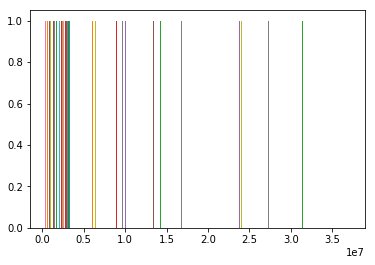

In [33]:
plt.hist(y, bins=10)
plt.show()

In [ ]:
# This also took a few minutes for my computer to run.
# Not sure why but it may be due to processing power on the back end.
# This link is the only issue I can find related to the problem.
# https://github.com/matplotlib/matplotlib/issues/821